In [101]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
import tensorflow as tf
from tensorflow import keras

In [2]:
data=pd.read_csv("1961to2020.csv")

In [4]:
year_data=data['year']

In [11]:
year_dict=year_data.value_counts().to_dict()

In [15]:
year_dict

{2014: 301,
 2019: 200,
 2017: 197,
 2016: 197,
 2015: 192,
 2013: 148,
 2018: 144,
 2012: 143,
 2010: 141,
 2011: 132,
 1985: 131,
 2009: 128,
 2008: 120,
 1992: 120,
 1982: 120,
 1984: 120,
 1990: 117,
 1991: 111,
 1986: 108,
 1980: 105,
 1981: 104,
 2007: 104,
 2005: 103,
 1989: 102,
 1988: 102,
 1987: 101,
 2003: 101,
 1983: 97,
 1979: 97,
 1993: 95,
 2006: 92,
 1994: 92,
 1995: 91,
 2004: 87,
 1978: 85,
 1999: 83,
 1997: 77,
 2002: 77,
 1996: 77,
 2001: 74,
 1998: 68,
 1977: 63,
 1974: 62,
 1975: 61,
 1976: 59,
 2020: 57,
 1972: 55,
 1973: 55,
 1967: 49,
 1968: 47,
 1971: 47,
 1962: 46,
 1965: 46,
 1969: 46,
 1963: 45,
 1970: 43,
 1966: 42,
 1961: 38,
 1964: 38}

In [20]:
sorted_dict=dict()

In [21]:
for i in range(1961,2020):
    if(i in year_dict.keys()):
        sorted_dict[i]=year_dict[i]
    else:
        sorted_dict[i]='UNK'

In [22]:
sorted_dict

{1961: 38,
 1962: 46,
 1963: 45,
 1964: 38,
 1965: 46,
 1966: 42,
 1967: 49,
 1968: 47,
 1969: 46,
 1970: 43,
 1971: 47,
 1972: 55,
 1973: 55,
 1974: 62,
 1975: 61,
 1976: 59,
 1977: 63,
 1978: 85,
 1979: 97,
 1980: 105,
 1981: 104,
 1982: 120,
 1983: 97,
 1984: 120,
 1985: 131,
 1986: 108,
 1987: 101,
 1988: 102,
 1989: 102,
 1990: 117,
 1991: 111,
 1992: 120,
 1993: 95,
 1994: 92,
 1995: 91,
 1996: 77,
 1997: 77,
 1998: 68,
 1999: 83,
 2000: 'UNK',
 2001: 74,
 2002: 77,
 2003: 101,
 2004: 87,
 2005: 103,
 2006: 92,
 2007: 104,
 2008: 120,
 2009: 128,
 2010: 141,
 2011: 132,
 2012: 143,
 2013: 148,
 2014: 301,
 2015: 192,
 2016: 197,
 2017: 197,
 2018: 144,
 2019: 200}

In [86]:
X_full=list(sorted_dict.values())

In [87]:
X_keys=list(sorted_dict.keys())

In [88]:
X_full

[38,
 46,
 45,
 38,
 46,
 42,
 49,
 47,
 46,
 43,
 47,
 55,
 55,
 62,
 61,
 59,
 63,
 85,
 97,
 105,
 104,
 120,
 97,
 120,
 131,
 108,
 101,
 102,
 102,
 117,
 111,
 120,
 95,
 92,
 91,
 77,
 77,
 68,
 83,
 'UNK',
 74,
 77,
 101,
 87,
 103,
 92,
 104,
 120,
 128,
 141,
 132,
 143,
 148,
 301,
 192,
 197,
 197,
 144,
 200]

In [93]:
Xk=X_keys[X_keys.index(2000)+1:]

In [94]:
Xk

[2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019]

In [38]:
X=X_full[X_full.index('UNK')+1:]

In [40]:
len(X)

19

In [43]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)
 

In [45]:
X_in,Y_in=split_sequence(X,3)

In [46]:
X_in.shape

(16, 3)

In [47]:
X_in = X_in.reshape((X_in.shape[0], X_in.shape[1], 1))

In [70]:
X_in.shape

(16, 3, 1)

In [74]:
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(3, 1)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))

optimizer = tf.keras.optimizers.SGD(lr=0.0001, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

In [75]:
model.fit(X_in, Y_in, epochs=500, verbose=1)

Epoch 1/500
1/1 [==============================] - 0s 998us/step - loss: 161.3603 - mae: 161.8603
Epoch 2/500
1/1 [==============================] - 0s 998us/step - loss: 157.6125 - mae: 158.1125
Epoch 3/500
1/1 [==============================] - 0s 2ms/step - loss: 153.6580 - mae: 154.1580
Epoch 4/500
1/1 [==============================] - 0s 1ms/step - loss: 151.1676 - mae: 151.6676
Epoch 5/500
1/1 [==============================] - 0s 997us/step - loss: 148.8583 - mae: 149.3583
Epoch 6/500
1/1 [==============================] - 0s 3ms/step - loss: 146.6208 - mae: 147.1208
Epoch 7/500
1/1 [==============================] - 0s 2ms/step - loss: 144.1994 - mae: 144.6994
Epoch 8/500
1/1 [==============================] - 0s 3ms/step - loss: 140.9668 - mae: 141.4668
Epoch 9/500
1/1 [==============================] - 0s 1ms/step - loss: 136.1004 - mae: 136.6004
Epoch 10/500
1/1 [==============================] - 0s 2ms/step - loss: 128.9359 - mae: 129.4359
Epoch 11/500
1/1 [===============

1/1 [==============================] - 0s 2ms/step - loss: 22.9264 - mae: 23.3972
Epoch 87/500
1/1 [==============================] - 0s 2ms/step - loss: 24.2137 - mae: 24.7083
Epoch 88/500
1/1 [==============================] - 0s 1ms/step - loss: 23.9466 - mae: 24.4466
Epoch 89/500
1/1 [==============================] - 0s 998us/step - loss: 24.1135 - mae: 24.6135
Epoch 90/500
1/1 [==============================] - 0s 2ms/step - loss: 23.1040 - mae: 23.5948
Epoch 91/500
1/1 [==============================] - 0s 2ms/step - loss: 24.5325 - mae: 25.0294
Epoch 92/500
1/1 [==============================] - 0s 2ms/step - loss: 23.1144 - mae: 23.6144
Epoch 93/500
1/1 [==============================] - 0s 2ms/step - loss: 23.7183 - mae: 24.2004
Epoch 94/500
1/1 [==============================] - 0s 994us/step - loss: 23.3530 - mae: 23.8488
Epoch 95/500
1/1 [==============================] - 0s 998us/step - loss: 23.0972 - mae: 23.5956
Epoch 96/500
1/1 [==============================] - 0s 3m

1/1 [==============================] - 0s 2ms/step - loss: 23.7729 - mae: 24.2708
Epoch 171/500
1/1 [==============================] - 0s 997us/step - loss: 24.1102 - mae: 24.6083
Epoch 172/500
1/1 [==============================] - 0s 995us/step - loss: 23.6254 - mae: 24.1230
Epoch 173/500
1/1 [==============================] - 0s 2ms/step - loss: 24.9027 - mae: 25.3820
Epoch 174/500
1/1 [==============================] - 0s 2ms/step - loss: 23.6998 - mae: 24.1974
Epoch 175/500
1/1 [==============================] - 0s 997us/step - loss: 25.4789 - mae: 25.9789
Epoch 176/500
1/1 [==============================] - 0s 2ms/step - loss: 24.3523 - mae: 24.8523
Epoch 177/500
1/1 [==============================] - 0s 3ms/step - loss: 24.6906 - mae: 25.1763
Epoch 178/500
1/1 [==============================] - 0s 4ms/step - loss: 24.1621 - mae: 24.6621
Epoch 179/500
1/1 [==============================] - 0s 998us/step - loss: 23.7223 - mae: 24.2014
Epoch 180/500
1/1 [===========================

1/1 [==============================] - 0s 995us/step - loss: 19.1687 - mae: 19.6686
Epoch 255/500
1/1 [==============================] - 0s 2ms/step - loss: 18.6428 - mae: 19.1428
Epoch 256/500
1/1 [==============================] - 0s 997us/step - loss: 21.7768 - mae: 22.2768
Epoch 257/500
1/1 [==============================] - 0s 4ms/step - loss: 26.5859 - mae: 27.0859
Epoch 258/500
1/1 [==============================] - 0s 997us/step - loss: 25.7252 - mae: 26.2252
Epoch 259/500
1/1 [==============================] - 0s 2ms/step - loss: 23.3426 - mae: 23.8426
Epoch 260/500
1/1 [==============================] - 0s 997us/step - loss: 25.6114 - mae: 26.1114
Epoch 261/500
1/1 [==============================] - 0s 3ms/step - loss: 24.2801 - mae: 24.7801
Epoch 262/500
1/1 [==============================] - 0s 996us/step - loss: 24.2068 - mae: 24.7067
Epoch 263/500
1/1 [==============================] - 0s 2ms/step - loss: 25.8337 - mae: 26.3337
Epoch 264/500
1/1 [=========================

1/1 [==============================] - 0s 4ms/step - loss: 20.6482 - mae: 21.1482
Epoch 339/500
1/1 [==============================] - 0s 997us/step - loss: 21.2378 - mae: 21.7378
Epoch 340/500
1/1 [==============================] - 0s 3ms/step - loss: 20.2262 - mae: 20.7241
Epoch 341/500
1/1 [==============================] - 0s 999us/step - loss: 21.8000 - mae: 22.3000
Epoch 342/500
1/1 [==============================] - 0s 4ms/step - loss: 20.1653 - mae: 20.6456
Epoch 343/500
1/1 [==============================] - 0s 2ms/step - loss: 21.9240 - mae: 22.4240
Epoch 344/500
1/1 [==============================] - 0s 3ms/step - loss: 19.1822 - mae: 19.6761
Epoch 345/500
1/1 [==============================] - 0s 2ms/step - loss: 21.3586 - mae: 21.8586
Epoch 346/500
1/1 [==============================] - 0s 3ms/step - loss: 20.0729 - mae: 20.5729
Epoch 347/500
1/1 [==============================] - 0s 2ms/step - loss: 21.8776 - mae: 22.3570
Epoch 348/500
1/1 [==============================]

1/1 [==============================] - 0s 995us/step - loss: 19.2103 - mae: 19.7103
Epoch 423/500
1/1 [==============================] - 0s 3ms/step - loss: 20.1136 - mae: 20.5891
Epoch 424/500
1/1 [==============================] - 0s 2ms/step - loss: 20.0688 - mae: 20.5553
Epoch 425/500
1/1 [==============================] - 0s 4ms/step - loss: 19.5483 - mae: 20.0456
Epoch 426/500
1/1 [==============================] - 0s 997us/step - loss: 19.9166 - mae: 20.4166
Epoch 427/500
1/1 [==============================] - 0s 2ms/step - loss: 19.6931 - mae: 20.1931
Epoch 428/500
1/1 [==============================] - 0s 989us/step - loss: 18.6567 - mae: 19.1186
Epoch 429/500
1/1 [==============================] - 0s 3ms/step - loss: 19.6364 - mae: 20.1248
Epoch 430/500
1/1 [==============================] - 0s 997us/step - loss: 19.2221 - mae: 19.7175
Epoch 431/500
1/1 [==============================] - 0s 3ms/step - loss: 18.5078 - mae: 18.9997
Epoch 432/500
1/1 [===========================

In [82]:
def moving_average_forecast(series, window_size):
  """Forecasts the mean of the last few values.
     If window_size=1, then this is equivalent to naive forecast"""
  forecast = []
  for time in range(len(series) - window_size):
    forecast.append(np.mean(series[time:time + window_size]))
  return np.array(forecast)

In [83]:
ma_forcast=moving_average_forecast(X,3)

In [84]:
import matplotlib.pyplot as plt


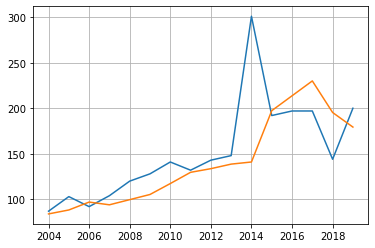

In [99]:
fig = plt.figure(1)	#identifies the figure 
plt.plot(Xk[3:],X[3:])
plt.plot(Xk[3:],ma_forcast)
plt.grid()
plt.show()


In [104]:
keras.metrics.mean_absolute_error(X[3:],ma_forcast).numpy()

25.458333333333336

In [105]:
# Prediction 

In [109]:
x_test=np.array([196,144,200])

In [111]:
x_test.shape

(3,)

In [116]:
x_test = x_test.reshape((1, 3, 1))

In [117]:
x_test.shape

(1, 3, 1)

In [118]:
model.predict(x_test)

array([[157.23473]], dtype=float32)

In [119]:
X.index(192)

14

In [120]:
ma_forcast=moving_average_forecast(X[14:],2)

In [121]:
ma_forcast

array([194.5, 197. , 170.5])

In [133]:
X_2015=X[14:]
X_2015

[192, 197, 197, 144, 200]

In [131]:
Xk[14:]

[2015, 2016, 2017, 2018, 2019]

In [135]:
X_2015[2:]

[197, 144, 200]

In [136]:
keras.metrics.mean_absolute_error(X_2015[2:],ma_forcast).numpy()

28.333333333333332